# Dia 2, primera parte: ML dia a dia

<a href="https://colab.research.google.com/github/beangoben/deep_learning_escuela_verano_19/blob/master/notebooks/2a_ML_dia_a_dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display
import sys

# Algunas perspectivas sobre ML

AI/ML/DL:

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/compare_AI_ML_DL.png?raw=true)

De xkcd:
![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/xkcd_ml.jpg?raw=true)

Mi perspectiva:
![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/ml_dl.png?raw=true)


* Michael Jordan "Artificial Intelligence — The Revolution Hasn’t Happened Yet": https://medium.com/@mijordan3/artificial-intelligence-the-revolution-hasnt-happened-yet-5e1d5812e1e7
* Neil D. Lawrence "Living Together: Mind and Machine Intelligence https://arxiv.org/abs/1705.07996

# Un paradigma para ML


Machine learning (aprendizaje machin para la banda), trata de crear algoritmos $M$ que puedan "aprender", que significa esto?

> A computer program is said to learn from experience $E$ with respect to some class of tasks $T$ and performance measure **P**, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$.
> > Machine Learning, Thomas M. Mitchell, 1997	

Los ingredientes esenciales son:

* $E$ (experiencia): De que vamos a aprender?
* $T$ (tareas): Que queremos hacer?
* $P$ (rendimiento): Como sabes que estamos mejorando?
* $M$ (modelo, algoritmo): Como vamos a crear un sistema para aprender?




# $E$ y $T$, vamos a conocer los datos!
AKA exploratory data analysis (EDA)


![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/atlas.png?raw=true)

Mas informacion:
http://opendata.cern.ch/record/328


Usaremos pandas para manipular datos

In [3]:
df=pd.read_csv('../data/HiggsBoson.csv')
print(df.columns)
target_col = 'Label'
df[target_col] = df[target_col].replace(to_replace=['s','b'],value=[1,0])
df = df.drop('EventId',axis=1)
print(df.shape)
df.head(1)

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')
(250000, 32)


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,...,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.002653,1


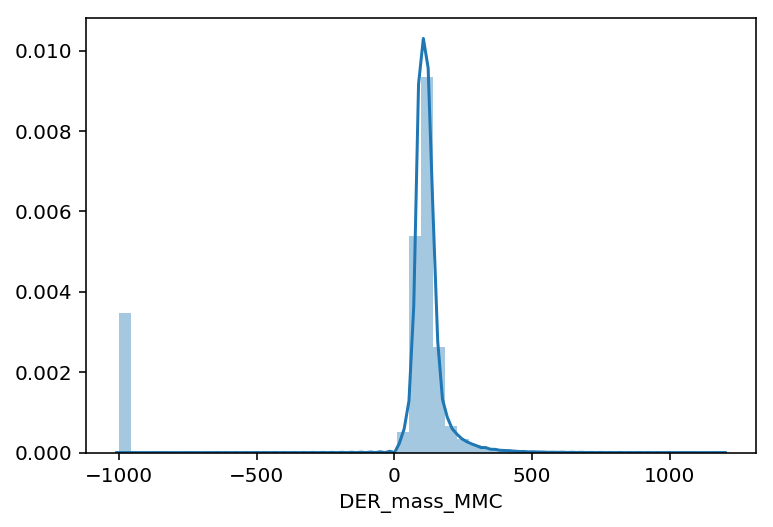

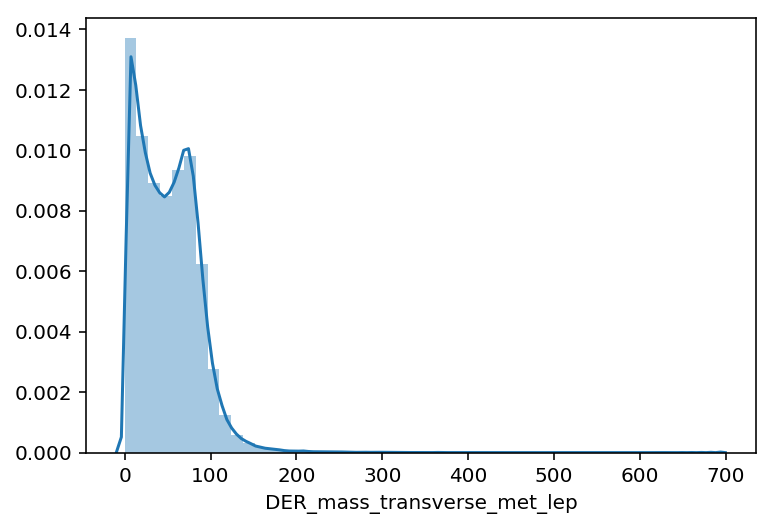

In [21]:
features = ['DER_mass_MMC', 'DER_mass_transverse_met_lep']
for f in features:
    sns.distplot(df[f])
    plt.show()


## modelos discriminativos vs generativos

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/generative_descriminative.png?raw=true)


## Tareas, distribuciones y perdidas (loss functions, $P$)

* Regression continua: Gaussiana (RMSE), t-student, gamma, beta, poisson, negative binomial, zero-inflated ..etc. 
* Regression ordinal: Ordinal (ordered logits,..muchos)
* Classificacion binaria: Bernoulli (Binary cross entropy)
* Classificacion multiclase: Multinomial (cross entropy)
* Classificacion multilabel: Multiples bernoulli (Binary cross entropy)
* y muchos mas



## Visualiza nuestro "target" ($y$)

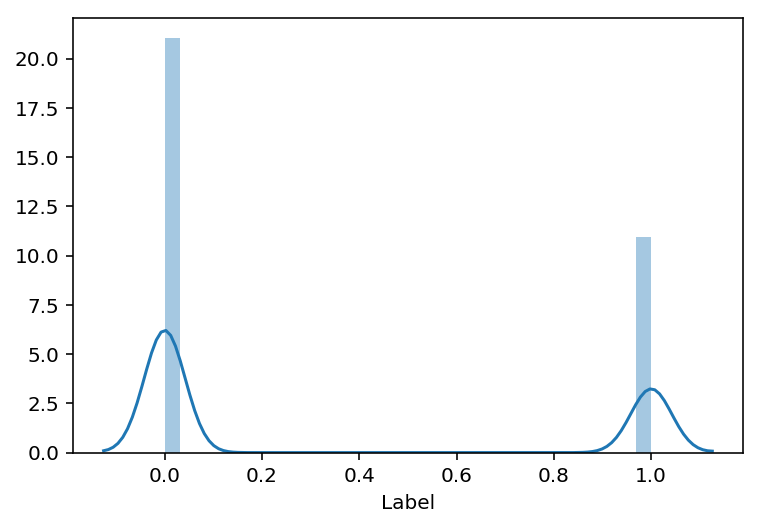

In [24]:
sns.distplot(df[target_col])

## Busca relaciones visuales
A "ojimetro" usando seaborn: https://seaborn.pydata.org/examples/index.html

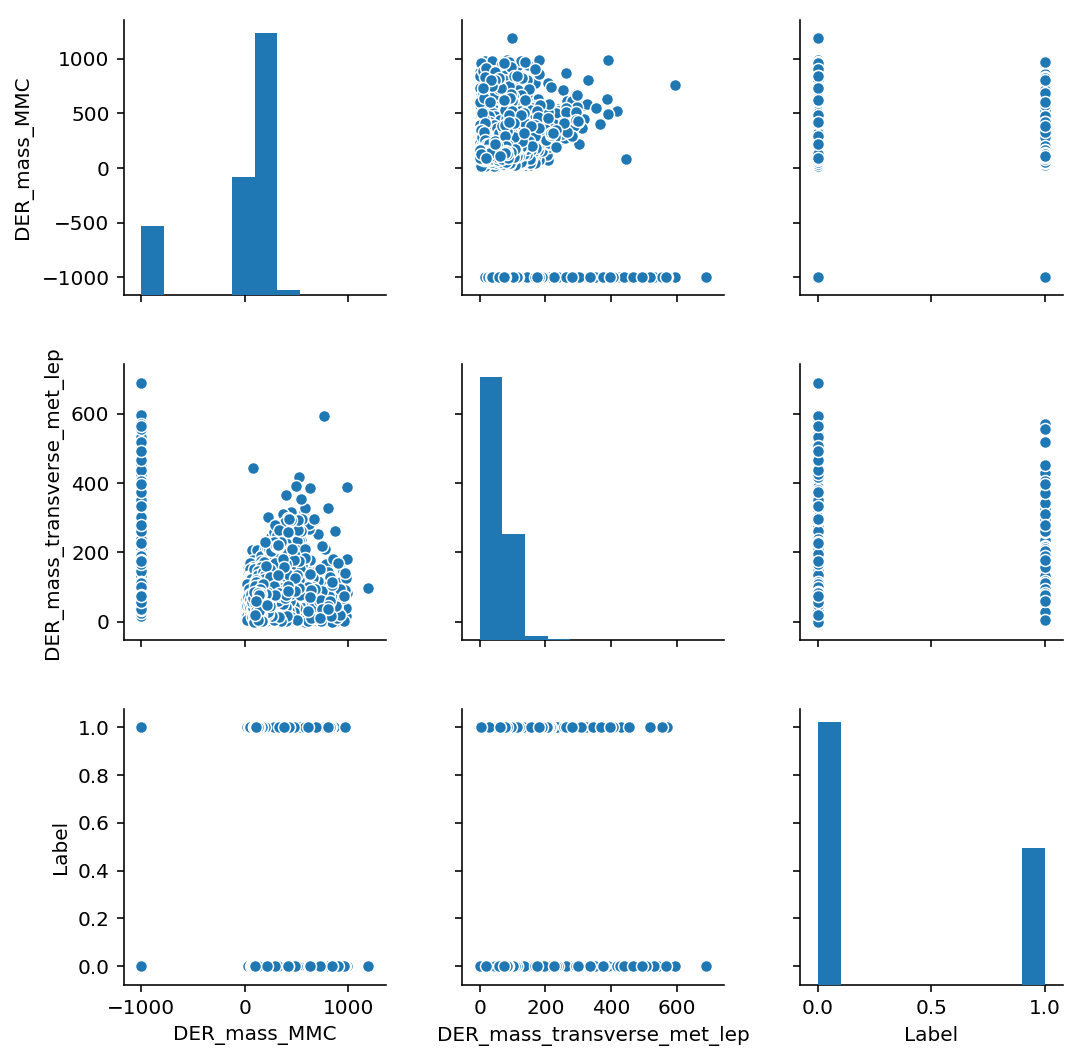

In [6]:
features = ['DER_mass_MMC', 'DER_mass_transverse_met_lep']
sns.pairplot(df[features+[target_col]])
plt.show()

## Pregunta: realmente necesitamos DL?

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/andrewng_dlml_data.png?raw=true)


Siempre es importante tener un "baseline", modelos base para saber cual es límite inferior en prediccion de tus datos.

## Definir performance $P$

https://scikit-learn.org/stable/modules/model_evaluation.html

Hay que tener en cuenta nuestra metricas para optimizar (tipicamente loss functions) y las metrics que realmente nos interesan.

### En nuestro caso nos interesa

https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

Approximate median significance (AMS), es el numero estimado de sigmas que tu modelo puede predecir. Si llegas a **6** ya descubriste el boson de higgs!

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/sigma_gaussian.png?raw=true)



In [7]:
import higgs_score

### Ojo!: Definir train/dev/test

* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

* http://scikit.ml/stratification.html


![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/data_splits.png?raw=true)

### design matrix ($X$ y $y$)

In [8]:
features = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

weights = df['Weight'].values
Y = df[target_col].values
X = df[features].values

In [9]:
from sklearn.model_selection import train_test_split
train_size = 0.3
X_train,X_test,Y_train,Y_test,w_train,w_test = train_test_split(X,Y,weights,train_size=train_size)
print(X_train.shape,Y_train.shape,w_train.shape)
print(X_test.shape,Y_test.shape,w_test.shape)

(75000, 30) (75000,) (75000,)
(175000, 30) (175000,) (175000,)


/home/beangoben/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## ML: modelos lineales

#### Regression logistica

**Modelo:** $M_{W,b}(x) = g(W x + b) = g(\sum \theta_i x_i +b)$ con $g(z)=sigmoid(z)=\frac{1}{1+e^{-z}}$

Nuestro model ($f(x)$) tiene la forma

$$ y \approx f(x) = g(W\cdot x +b) $$

donde $g(z)=sigmoid(z)=\frac{1}{1+e^{-z}}$, y para una coleccion de pares de inputs y targets $\{(x_i,y_i)\}$, queremos minimizar:

$$ \sum_i^n \| y_i - f(x_i) \|^2$$



In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(verbose=1)
model.fit(X_train,Y_train)

/home/beangoben/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=1, warm_start=False)

## Predecir con el modelo

In [24]:
#Y_pred_train = model.predict(X_train) # predice la clase
#Y_pred_test = model.predict(X_test) # predice la clase
p_tol = 0.5
Y_pred_train = model.predict_proba(X_train)[:,1] > p_tol
Y_pred_test = model.predict_proba(X_test)[:,1] > p_tol
higgs_score.evaluate(Y_train, Y_pred_train, w_train, Y_test, Y_pred_test, w_test)

--- Resultados --
- AUC train: 0.695 
- AUC test : 0.698 
- AMS train: 1.681 sigma
- AMS test : 2.220 sigma


(1.681121552243234, 2.2198817862737745)

## Interpretar variables

a = [[ 5.65415179e-04 -1.83919656e-02 -2.59811418e-02  2.65273965e-03
  -2.71892302e-01  2.87113265e-03 -5.79380462e-02  1.26897729e+00
   1.56554875e-04  1.69854398e-02 -8.80680167e-01  1.91409536e-01
   3.82719708e-01  7.13494910e-03 -9.23303324e-03 -7.93327515e-03
   2.80264391e-02 -2.56108794e-03 -2.18427610e-03  7.64661606e-03
  -2.34171977e-03 -1.68926694e-03 -7.75155024e-01 -2.84587451e-03
   5.36911408e-03 -1.36003655e-03 -7.74741508e-03 -1.59188709e-02
  -3.07570995e-02 -1.81319012e-02]]
b = [-0.39300619]


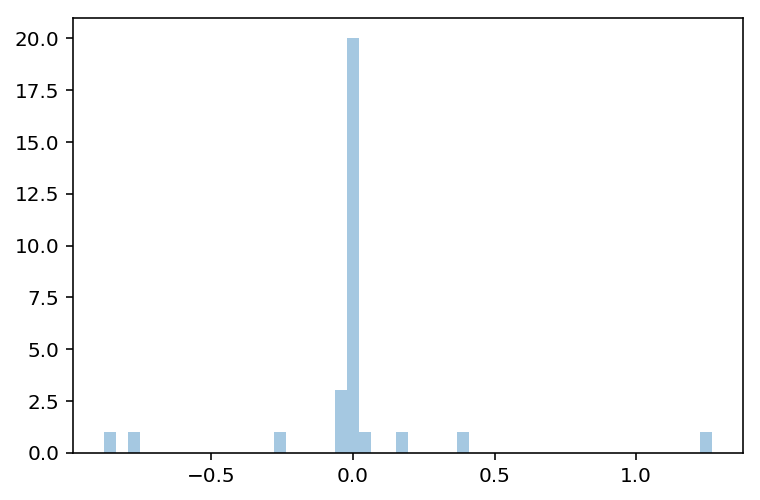

In [26]:
print('a = {}'.format(model.coef_))
print('b = {}'.format(model.intercept_))
sns.distplot(model.coef_,kde=False)
plt.show()

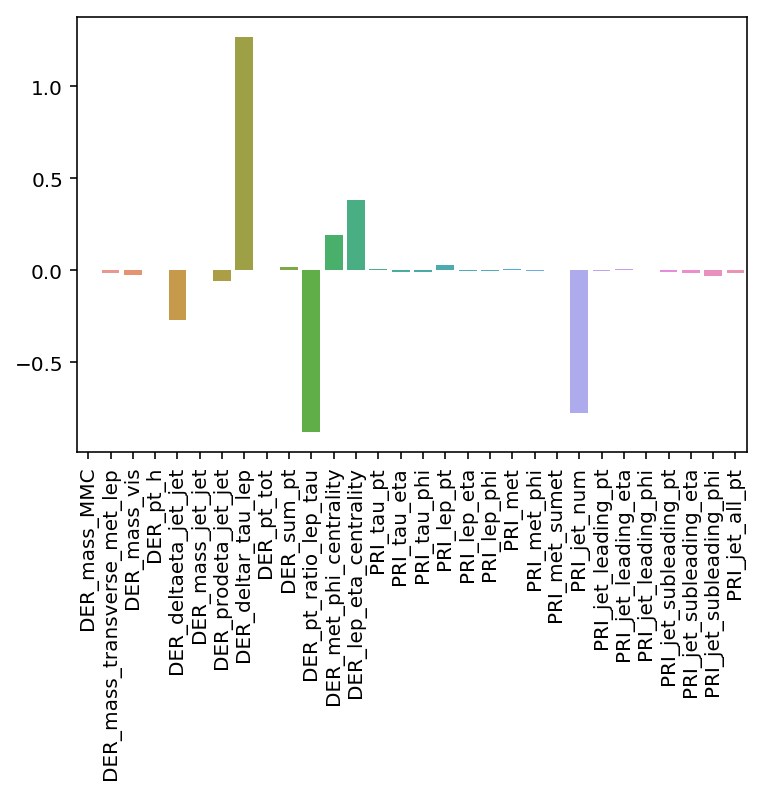

In [41]:
sns.barplot(x=features,y=model.coef_.ravel())
plt.xticks(rotation=90)
plt.show()

## Ojo: Preprocessing, standard scaling
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

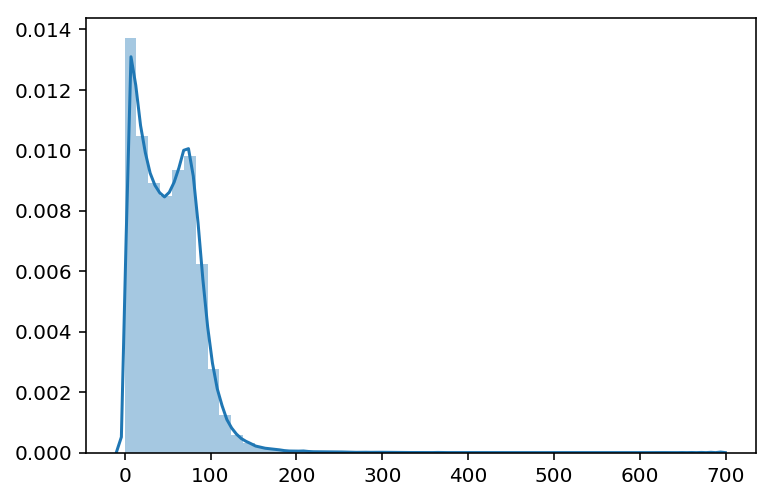

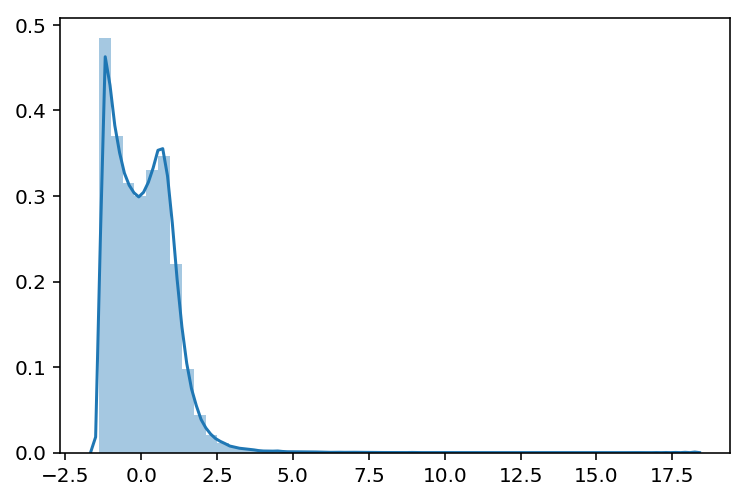

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
old_x = df['DER_mass_transverse_met_lep'].values.reshape(-1,1)
scaler.fit(old_x)
new_x = scaler.transform(old_x)
sns.distplot(old_x)
plt.show()
sns.distplot(new_x)
plt.show()

### Curva roc

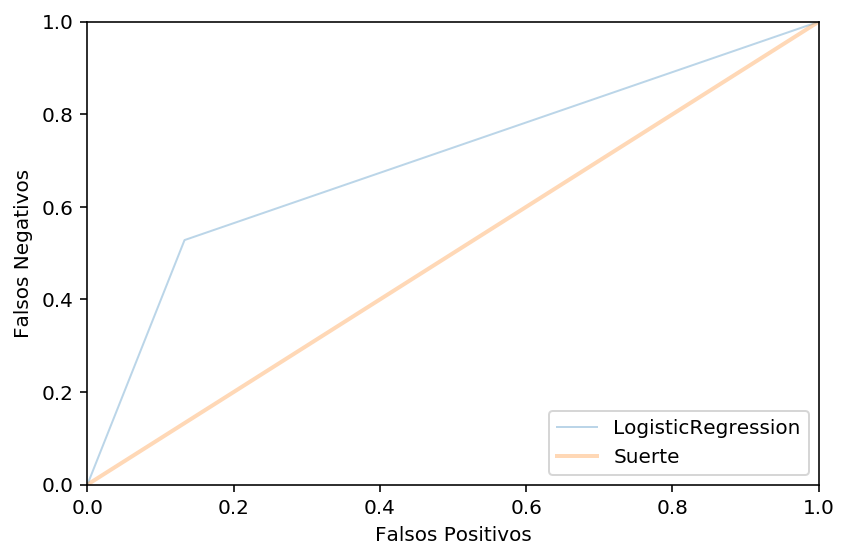

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label=str(model.__class__.__name__))
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), lw=2, alpha=0.3, label='Suerte')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Falsos Positivos')
plt.ylabel('Falsos Negativos')
plt.tight_layout()
plt.show()

## Random Forest

![](https://github.com/beangoben/deep_learning_escuela_verano_19/blob/master/media/dia2/rf.jpg?raw=true)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)

/home/beangoben/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
#Y_pred_train = model.predict(X_train) # predice la clase
#Y_pred_test = model.predict(X_test) # predice la clase
p_tol = 0.5
Y_pred_train = model.predict_proba(X_train)[:,1] > p_tol
Y_pred_test = model.predict_proba(X_test)[:,1] > p_tol
higgs_score.evaluate(Y_train, Y_pred_train, w_train, Y_test, Y_pred_test, w_test)

--- Resultados --
- AUC train: 0.983 
- AUC test : 0.778 
- AMS train: 18.444 sigma
- AMS test : 2.886 sigma


(18.444325600757924, 2.8859295172867703)

### Feature importance

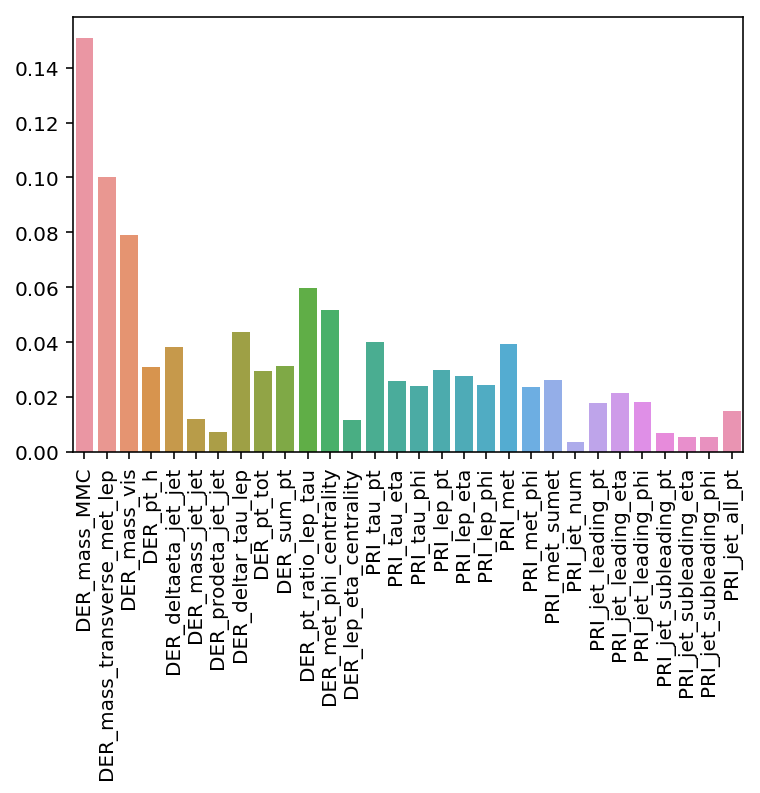

In [37]:
sns.barplot(x=features,y=model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Actividad: escogete un model de ML

https://scikit-learn.org/stable/supervised_learning.html

Cual es el mejor modelo que puedes encontrar?